In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sample = pd.read_csv('.//sample.csv', index_col=0)
sample.head()

,timeseries_1,timeseries_2
0,-0.183108,-0.183108
1,-0.245540,-0.117365
2,-0.258830,-0.218789
3,-0.279635,-0.169041
4,-0.384736,-0.282374


In [2]:
from statsmodels.tsa.arima.model import ARIMA

# Instantiate the model
model = ARIMA(sample['timeseries_1'], order=(2, 0, 0))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:           timeseries_1   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 148.855
Date:                Mon, 27 Nov 2023   AIC                           -289.709
Time:                        08:16:44   BIC                           -270.078
Sample:                             0   HQIC                          -282.248
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.018     -0.151      0.880      -0.037       0.032
ar.L1          0.8980      0.031     28.660      0.000       0.837       0.959
ar.L2         -0.2704      0.032     -8.561      0.0

In [5]:
# Instantiate the model
earthquake = pd.read_csv('.//earthquakes.csv', index_col=0,parse_dates=True)
model = ARIMA(earthquake['earthquakes_per_year'], order=(3, 0 ,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                   ARIMA(3, 0, 1)   Log Likelihood                -315.673
Date:                  Mon, 27 Nov 2023   AIC                            643.345
Time:                          08:28:35   BIC                            658.916
Sample:                      01-01-1900   HQIC                           649.645
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6453      2.233      8.798      0.000      15.269      24.022
ar.L1          0.5795      0.645      0.899      0.369      -0.684       1.843
ar.L2          0.0251      0.308    

In [7]:
hospital = pd.read_csv('.//hospital.csv', index_col=0, parse_dates=True)
hospital.head()

,wait_times_hrs,nurse_count
2019-03-04 00:00:00,1.747261,1.0
2019-03-04 01:00:00,1.664634,1.0
2019-03-04 02:00:00,1.647047,1.0
2019-03-04 03:00:00,1.619512,1.0
2019-03-04 04:00:00,1.480415,1.0


array([<Axes: >, <Axes: >], dtype=object)

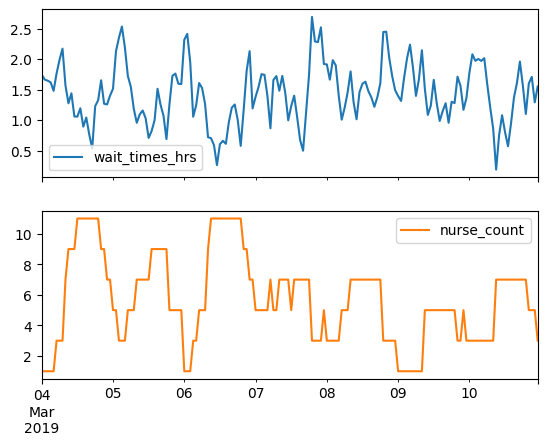

In [8]:
hospital.plot(subplots=True)

In [9]:
# Instantiate the model
model = ARIMA(hospital['wait_times_hrs'], order=(2, 0, 1), exog=hospital['nurse_count'])

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         wait_times_hrs   No. Observations:                  168
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -11.834
Date:                Mon, 27 Nov 2023   AIC                             35.668
Time:                        08:30:04   BIC                             54.411
Sample:                    03-04-2019   HQIC                            43.275
                         - 03-10-2019                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1001      0.086     24.375      0.000       1.931       2.269
nurse_count    -0.1171      0.012     -9.562      0.000      -0.141      -0.093
ar.L1           0.5693      0.169      3.365    

In [10]:
amazon = pd.read_csv('.//amazon_close.csv', parse_dates=True, index_col='date')
amazon = amazon.iloc[::-1] 

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(amazon.loc['2018-01-01':'2019-02-08'], order=(3, 1, 3), seasonal_order=(1, 0, 1, 7),
                enforce_invertibility=False,
                enforce_stationarity=False,
                simple_differencing=False, 
                measurement_error=False,
                k_trend=0)
results = model.fit()

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['k_trend']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: Conver

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               close   No. Observations:                  278
Model:             SARIMAX(3, 1, 3)x(1, 0, [1], 7)   Log Likelihood               -1338.386
Date:                             Mon, 27 Nov 2023   AIC                           2694.772
Time:                                     08:34:57   BIC                           2727.023
Sample:                                          0   HQIC                          2707.729
                                             - 278                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1075      0.048      2.248      0.025       0.014       0.201
ar.L2          0.0526      0.039      1.362      0.173      -0.023       0.128
ar.L3         -0.8974      0.042    -21.547      0.000      -0.979      -0.816
ma.L1         -0.1202      0.039     -3.075      0.002      -0.197      -0.044
ma.L2         -0.1414      0.034     -4.141      0.000      -0.208      -0.074
ma.L3          0.9686      0.045     21.437      0.000       0.880       1.057
ar.S.L7        0.1696      0.681      0.249      0.803      -1.166       1.505
ma.S.L7       -0.2123      0.672     -0.316      0.752      -1.530       1.106
sigma2      1331.7578    108.515     12.273      0.000    1119.073    1544.443
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                21.81
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               3.10   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate  predictions
print(mean_forecast.values)

[1475.40380275 1462.74492882 1471.19166994 1498.16749989 1537.65065854
 1507.93732676 1581.09583637 1627.08584385 1650.29369231 1649.50241908
 1657.85100237 1647.93207793 1625.7642006  1670.94310644 1672.334455
 1683.46121758 1693.83522991 1642.4442927  1657.24173444 1652.14401704
 1661.24716809 1620.86627793 1594.93512565 1679.48896151 1724.93988129
 1629.05268334 1638.28954296 1647.46183118 1636.78598962 1606.56189141]


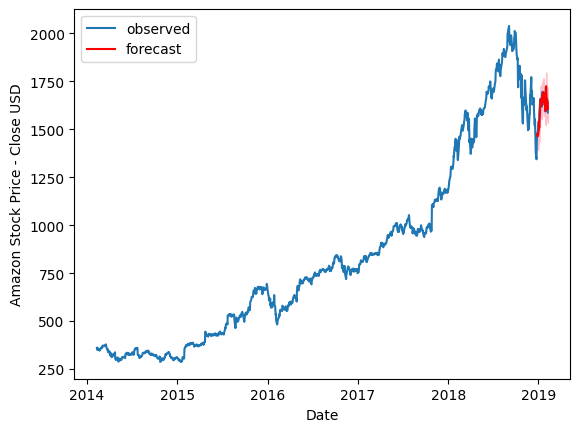

In [14]:
# plot the amazon data
plt.plot(amazon.index, amazon['close'], label='observed')

# Plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

In [15]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:, 'lower close']
upper_limits = confidence_intervals.loc[:, 'upper close']

# Print bet estimate predictions
print(mean_forecast.values)

[1475.40380275 1476.31263338 1468.48434491 1467.28747526 1468.40672015
 1478.26709249 1476.86227714 1480.02567622 1472.64518634 1469.92433955
 1467.02174621 1473.6092769  1477.07777473 1479.79189982 1474.99928573
 1471.71791664 1468.10841859 1471.95298794 1475.19234603 1479.0619847
 1476.09509934 1473.18201191 1469.27466313 1471.26709082 1473.90765091
 1477.81489225 1476.59964445 1474.28741877 1470.48708791 1471.05310173]


In [16]:
amazon = amazon.loc['2017-12':]
amazon.head()

,close
date,
2017-12-01,1162.35
2017-12-04,1133.95
2017-12-05,1141.57
2017-12-06,1152.35
2017-12-07,1159.79


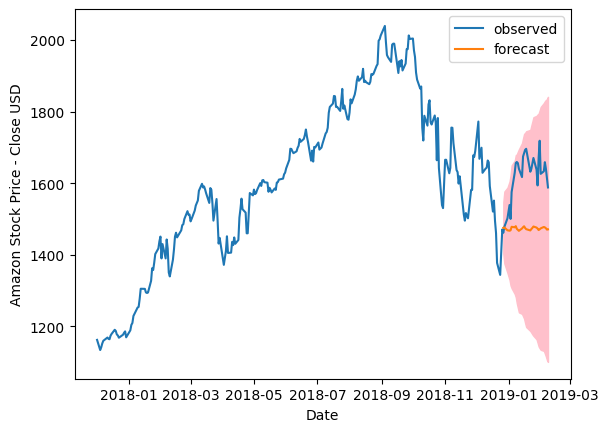

In [17]:
# plot the amazon data
plt.plot(amazon.index, amazon['close'], label='observed')

# Plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, label='forecast')

# Shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

In [18]:
amazon = pd.read_csv('.//amazon_close.csv', parse_dates=True, index_col='date')
display(amazon.head())
amazon.sort_index(inplace=True)
display(amazon.head())

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


,close
date,
2014-02-10,360.87
2014-02-11,361.79
2014-02-12,349.25
2014-02-13,357.20
2014-02-14,357.35


In [19]:
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2, 2) model
arma = SARIMAX(amazon_diff, order=(2, 0, 2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -5531.159
Date:                Mon, 27 Nov 2023   AIC                          11072.318
Time:                        08:38:24   BIC                          11098.004
Sample:                             0   HQIC                         11081.971
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0770      0.004    259.194      0.000       1.069       1.085
ar.L2         -0.9950      0.004   -273.545      0.000      -1.002      -0.988
ma.L1         -1.0915      0.006   -177.366      0.0

In [22]:
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = ARIMA(amazon_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -5532.371
Date:                Mon, 27 Nov 2023   AIC                          11076.743
Time:                        08:41:49   BIC                          11107.566
Sample:                             0   HQIC                         11088.327
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9867      0.494      1.996      0.046       0.018       1.955
ar.L1         -0.1541      0.073     -2.119      0.034      -0.297      -0.012
ar.L2          0.7945      0.072     11.085      0.0

In [20]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1, 0]

# Print forecast
print(arma_value_forecast)

1258    1593.662430
1259    1601.966970
1260    1605.495915
1261    1601.033882
1262    1592.717137
1263    1588.199594
1264    1591.609054
1265    1599.775798
1266    1605.179062
1267    1602.872761
Name: predicted_mean, dtype: float64


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [21]:
# Create ARIMA(2,1,2) model
arima = SARIMAX(amazon, order=(2, 1, 2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1259    1593.639455
1260    1601.906411
1261    1605.418925
1262    1600.976727
1263    1592.696654
1264    1588.197619
1265    1591.590210
1266    1599.721277
1267    1605.104189
1268    1602.811957
Name: predicted_mean, dtype: float64


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [23]:
# Create ARIMA(2,1,2) model
arima = ARIMA(amazon, order=(2, 1, 2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1259    1593.639455
1260    1601.906411
1261    1605.418925
1262    1600.976727
1263    1592.696654
1264    1588.197619
1265    1591.590210
1266    1599.721277
1267    1605.104189
1268    1602.811957
Name: predicted_mean, dtype: float64


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
